In [36]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.metrics import confusion_matrix, classification_report, recall_score, make_scorer, accuracy_score, balanced_accuracy_score, f1_score, precision_score, roc_auc_score

X_train = pd.read_csv('./X_train.csv', index_col=0)
X_test = pd.read_csv('./X_test.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)
y_test = pd.read_csv('./y_test.csv', index_col=0)

In [2]:
X_train.head()

,Unique_County,Unique_States,Avg_AdmissionDuration,Avg_ClaimDuration,Avg_Total_ClmProcedureCode,Avg_Total_ClmDiagnosisCode,DiagnosisGroupCode_count,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
3593,-0.726554,-0.625131,2.348460,1.933499,3.433855,1.468203,-0.256642,-0.249839,-0.468208,-0.522145,...,0.45,0.00,0.00,0.00,0.00,0.18,0.18,0.27,0.36,0.00
2495,0.038377,0.272537,-0.076676,-0.354683,-0.119036,-0.082437,0.667357,0.788190,0.240953,0.460143,...,0.28,0.12,0.01,0.02,0.01,0.04,0.22,0.38,0.21,0.12
952,-0.344089,-0.625131,0.668451,0.869776,0.385406,0.537213,-0.212642,-0.196607,-0.442263,-0.537988,...,0.22,0.09,0.00,0.03,0.03,0.06,0.06,0.44,0.28,0.09
1910,0.038377,-0.400714,0.996046,0.844569,0.760366,1.191422,0.315357,0.335716,-0.174165,-0.031001,...,0.39,0.10,0.00,0.00,0.02,0.06,0.22,0.51,0.16,0.04
2219,2.078190,3.863209,-0.210402,-0.251295,-0.272617,-0.231894,1.327356,1.506826,1.071190,1.394900,...,0.32,0.11,0.01,0.02,0.02,0.07,0.18,0.34,0.28,0.09


In [3]:
X_train.shape

(6865, 35)

In [4]:
y_train = pd.Series(y_train['PotentialFraud'], dtype='int32')

In [5]:
y_test = pd.Series(y_test['PotentialFraud'], dtype='int32')

In [37]:
svm= svm.SVC(random_state=1) 

param_grid_svm = [
    {'C': range(2000, 4500, 300), #opposite of lasso C penalty
     'kernel': ['poly'], #nonlinear  ~ CURVY/bendy, solves for alpha 
     'degree': [3, 4, 5]}, #nonlinear - degree of polynomial 
    
    {'C': range(2000, 4500, 300), #how much you want to penalize (higher C means possible overfitting)
     'gamma': np.logspace(-2, -4, 5), # width of the RBF curve, hyperparameter for rbf kernel, larger gamma is the smaller sd is 
     #thin the radial
     'kernel': ['rbf']} # nonlinear, oval/circle (no degree for rbf) RADIAL (default)
]  
#Bo is coef0 

In [39]:
svm_search = GridSearchCV(svm, param_grid_svm, scoring='roc_auc', cv=KFold(shuffle= True, random_state=1), verbose=2, return_train_score=True, n_jobs=-1)
svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  5.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(random_state=1), n_jobs=-1,
             param_grid=[{'C': range(2000, 4500, 300), 'degree': [3, 4, 5],
                          'kernel': ['poly']},
                         {'C': range(2000, 4500, 300),
                          'gamma': array([0.01      , 0.00316228, 0.001     , 0.00031623, 0.0001    ]),
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='roc_auc', verbose=2)

In [41]:
print(svm_search.best_params_)
print(svm_search.best_score_)
print(svm_search.score(X_train, y_train))
print(svm_search.score(X_test, y_test))

{'C': 4400, 'gamma': 0.01, 'kernel': 'rbf'}
0.9622227250183594
0.9748540236312138
0.9566498868517067


In [44]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = svm_search.predict(X_test) 
cmSVM = confusion_matrix(y_true, y_pred)
cmSVM

array([[1302,  173],
       [  79, 1389]], dtype=int64)

Text(24.0, 0.5, 'Actual Value')

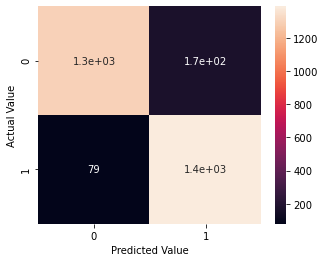

In [45]:
plt.figure(figsize=(5,4))
sns.heatmap(cmSVM, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')